In [8]:
"""
Today's topic is to analyze a sample of trades using pandas. 
The metrics calculated are useful to determine profitability, consistency and risks of a trading strategy.

1) Biggest Win/Loss
2) Average Win/Loss
3) Win Rate
4) Reward-to-Risk Ratio
5) Result by order type
6) Result by day of week
7) Max Absolute Drawdown
"""

'\n1) Biggest Win/Loss\n2) Average Win/Loss\n3) Max Consecutive Wins/Losses\n4) Win Rate\n5) Reward-to-Risk Ratio\n6) Result by order type\n7) Result by day of week\n8) Max Absolute Drawdown\n9) Max Absolute Drawdown\n10) Longest Drawdown Period\n'

In [4]:
import pandas as pd
import plotly.express as px
from IPython.display import display

,Unnamed: 0,symbol,volume_lots,order_type,open_price,close_time,close_price,profit,profit_cumulative
0,0,GBPJPY,1,sell,140.663,2021-01-04 17:00:00,140.2320,285.43,285.43
1,1,GBPJPY,1,sell,139.698,2021-01-05 17:00:00,139.8150,-77.48,207.95
2,2,GBPJPY,1,buy,140.203,2021-01-06 16:00:00,139.9110,-193.38,14.57
3,3,GBPJPY,1,buy,140.615,2021-01-07 17:00:00,140.8110,129.80,144.37
4,4,GBPJPY,1,buy,140.976,2021-01-08 17:00:00,141.1220,96.69,241.06
...,...,...,...,...,...,...,...,...,...
626,626,GBPJPY,1,buy,180.371,2023-10-04 17:00:00,180.9540,386.09,15094.95
627,627,GBPJPY,1,buy,181.249,2023-10-06 15:45:00,180.9915,-170.53,14924.42
628,628,GBPJPY,1,sell,181.712,2023-10-09 17:00:00,181.8030,-60.26,14864.16
629,629,GBPJPY,1,buy,182.126,2023-10-10 17:00:00,182.4750,231.13,15095.29


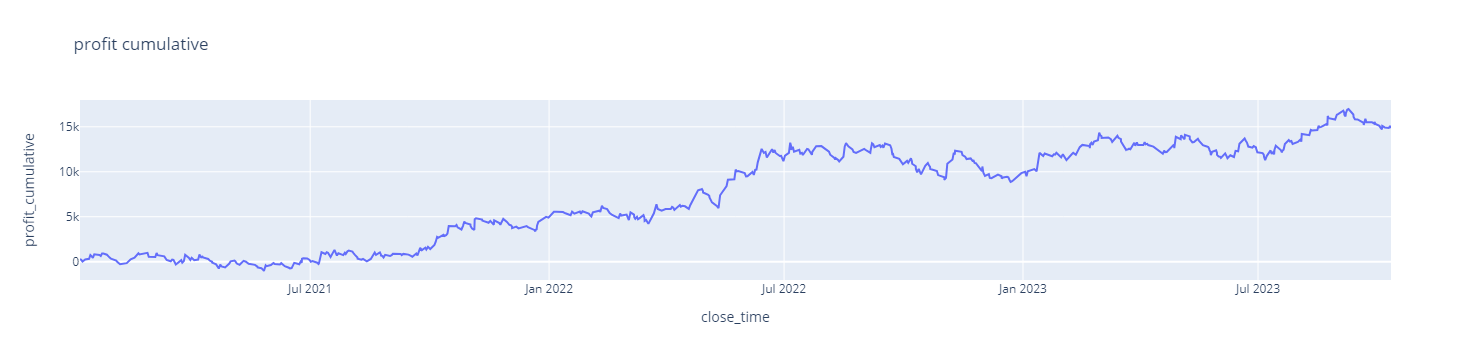

In [47]:
df = pd.read_csv('backtest_sample.csv')
df['profit'] = df['profit'].round(2)
df['profit_cumulative'] = df['profit'].cumsum()
df['close_time'] = pd.to_datetime(df['close_time'])
display(df)

fig = px.line(df, x='close_time', y='profit_cumulative', title='profit cumulative')
display(fig)

In [14]:
# 1) Biggest Win/Loss

biggest_win = df['profit'].max()
print('biggest_profit', biggest_win)

biggest_loss = df['profit'].min()
print('biggest_loss', biggest_loss)

biggest_profit 1572.19
biggest_loss -704.3


In [15]:
# 2) Average Win/Loss

win_trades = df[df['profit'] > 0]
display(win_trades)

loss_trades = df[df['profit'] < 0]
display(loss_trades)

avg_win = win_trades['profit'].mean()
print('avg_win', avg_win)

avg_loss = loss_trades['profit'].mean()
print('avg_loss', avg_loss)

,Unnamed: 0,symbol,volume_lots,order_type,open_price,close_time,close_price,profit,profit_cumulative
0,0,GBPJPY,1,sell,140.663,2021-01-04 17:00:00,140.232,285.43,285.43
3,3,GBPJPY,1,buy,140.615,2021-01-07 17:00:00,140.811,129.80,144.37
4,4,GBPJPY,1,buy,140.976,2021-01-08 17:00:00,141.122,96.69,241.06
5,5,GBPJPY,1,sell,140.558,2021-01-11 17:00:00,140.436,80.79,321.85
6,6,GBPJPY,1,buy,141.182,2021-01-12 17:00:00,141.820,422.52,744.37
...,...,...,...,...,...,...,...,...,...
607,607,GBPJPY,1,buy,184.146,2023-09-08 17:00:00,184.263,77.48,16980.04
617,617,GBPJPY,1,sell,182.345,2023-09-21 17:00:00,181.324,676.16,15891.31
621,621,GBPJPY,1,buy,181.726,2023-09-28 17:00:00,182.028,200.00,15549.92
626,626,GBPJPY,1,buy,180.371,2023-10-04 17:00:00,180.954,386.09,15094.95


,Unnamed: 0,symbol,volume_lots,order_type,open_price,close_time,close_price,profit,profit_cumulative
1,1,GBPJPY,1,sell,139.698,2021-01-05 17:00:00,139.8150,-77.48,207.95
2,2,GBPJPY,1,buy,140.203,2021-01-06 16:00:00,139.9110,-193.38,14.57
7,7,GBPJPY,1,buy,141.882,2021-01-13 10:00:00,141.7425,-92.38,651.99
8,8,GBPJPY,1,buy,141.873,2021-01-13 16:45:00,141.7425,-86.42,565.57
9,9,GBPJPY,1,buy,142.000,2021-01-14 15:30:00,141.7880,-140.40,425.17
...,...,...,...,...,...,...,...,...,...
624,624,GBPJPY,1,sell,180.615,2023-10-03 10:45:00,180.9920,-249.67,14864.82
625,625,GBPJPY,1,sell,179.816,2023-10-04 11:00:00,180.0515,-155.96,14708.86
627,627,GBPJPY,1,buy,181.249,2023-10-06 15:45:00,180.9915,-170.53,14924.42
628,628,GBPJPY,1,sell,181.712,2023-10-09 17:00:00,181.8030,-60.26,14864.16


avg_win 372.3845528455285
avg_loss -199.337012987013


In [20]:
# 3) Win Rate
# Formula: win_rate = count_profit_trades / count_loss_trades

count_profit_trades = win_trades.shape[0]
print('count_profit_trades', count_profit_trades)

count_loss_trades = loss_trades.shape[0]
print('count_loss_trades', count_loss_trades)

win_rate = count_profit_trades / count_loss_trades
print('win_rate', round(win_rate, 2))

count_profit_trades 246
count_loss_trades 385
win_rate 0.64


In [23]:
# 4) Reward-to-Risk-Ratio
rrr = abs(avg_win / avg_loss)
print('rrr', round(rrr, 2))

rrr 1.87


,order_type,profit
0,buy,9303.93
1,sell,5557.92


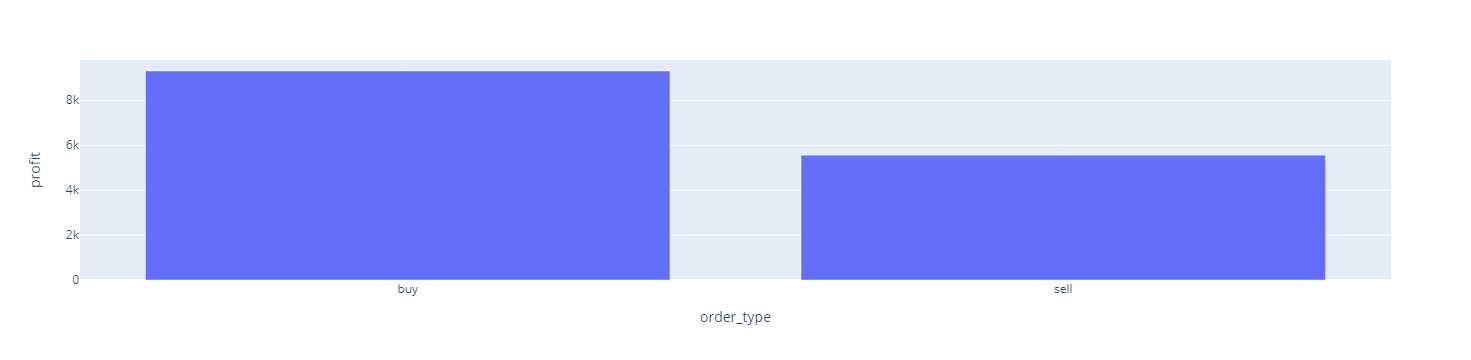

In [44]:
# 6 result by order type
df_by_ordertype = df.groupby('order_type', as_index=False)['profit'].sum()
display(df_by_ordertype)

fig_ordertype = px.bar(df_by_ordertype, x='order_type', y='profit')
display(fig_ordertype)

,Unnamed: 0,symbol,volume_lots,order_type,open_price,close_time,close_price,profit,profit_cumulative,dayofweek
0,0,GBPJPY,1,sell,140.663,2021-01-04 17:00:00,140.2320,285.43,285.43,0
1,1,GBPJPY,1,sell,139.698,2021-01-05 17:00:00,139.8150,-77.48,207.95,1
2,2,GBPJPY,1,buy,140.203,2021-01-06 16:00:00,139.9110,-193.38,14.57,2
3,3,GBPJPY,1,buy,140.615,2021-01-07 17:00:00,140.8110,129.80,144.37,3
4,4,GBPJPY,1,buy,140.976,2021-01-08 17:00:00,141.1220,96.69,241.06,4
...,...,...,...,...,...,...,...,...,...,...
626,626,GBPJPY,1,buy,180.371,2023-10-04 17:00:00,180.9540,386.09,15094.95,2
627,627,GBPJPY,1,buy,181.249,2023-10-06 15:45:00,180.9915,-170.53,14924.42,4
628,628,GBPJPY,1,sell,181.712,2023-10-09 17:00:00,181.8030,-60.26,14864.16,0
629,629,GBPJPY,1,buy,182.126,2023-10-10 17:00:00,182.4750,231.13,15095.29,1


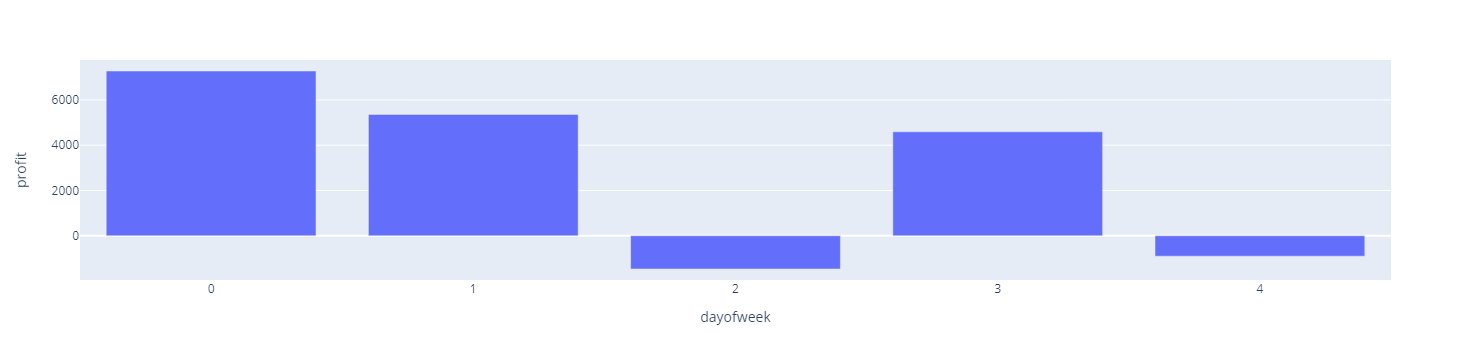

In [51]:
# 6) Result by day of week
df['dayofweek'] = df['close_time'].dt.dayofweek
display(df)

df_by_day = df.groupby('dayofweek', as_index=False)['profit'].sum()
fig_day = px.bar(df_by_day, x='dayofweek', y='profit')
display(fig_day)

,Unnamed: 0,symbol,volume_lots,order_type,open_price,close_time,close_price,profit,profit_cumulative,dayofweek,current_max,drawdown
0,0,GBPJPY,1,sell,140.663,2021-01-04 17:00:00,140.2320,285.43,285.43,0,285.43,0.00
1,1,GBPJPY,1,sell,139.698,2021-01-05 17:00:00,139.8150,-77.48,207.95,1,285.43,-77.48
2,2,GBPJPY,1,buy,140.203,2021-01-06 16:00:00,139.9110,-193.38,14.57,2,285.43,-270.86
3,3,GBPJPY,1,buy,140.615,2021-01-07 17:00:00,140.8110,129.80,144.37,3,285.43,-141.06
4,4,GBPJPY,1,buy,140.976,2021-01-08 17:00:00,141.1220,96.69,241.06,4,285.43,-44.37
...,...,...,...,...,...,...,...,...,...,...,...,...
626,626,GBPJPY,1,buy,180.371,2023-10-04 17:00:00,180.9540,386.09,15094.95,2,16980.04,-1885.09
627,627,GBPJPY,1,buy,181.249,2023-10-06 15:45:00,180.9915,-170.53,14924.42,4,16980.04,-2055.62
628,628,GBPJPY,1,sell,181.712,2023-10-09 17:00:00,181.8030,-60.26,14864.16,0,16980.04,-2115.88
629,629,GBPJPY,1,buy,182.126,2023-10-10 17:00:00,182.4750,231.13,15095.29,1,16980.04,-1884.75


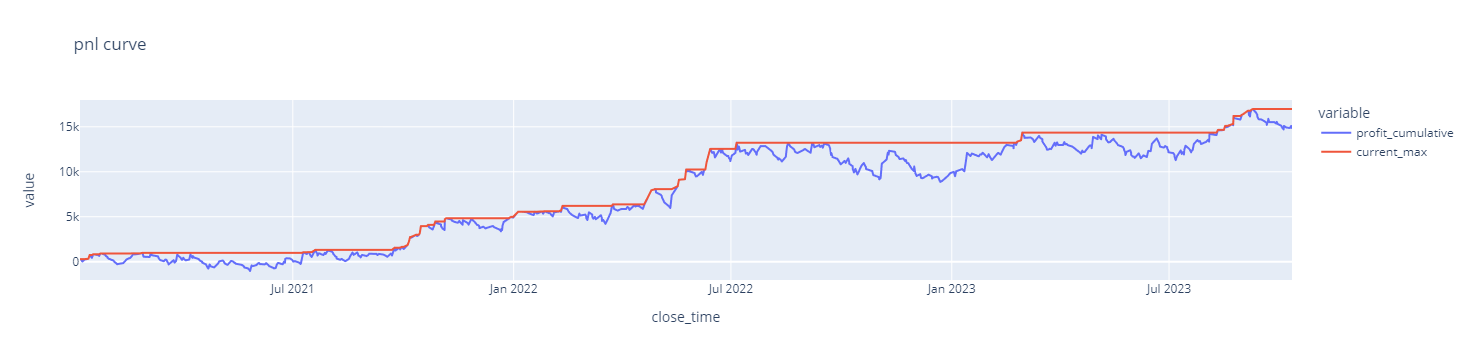

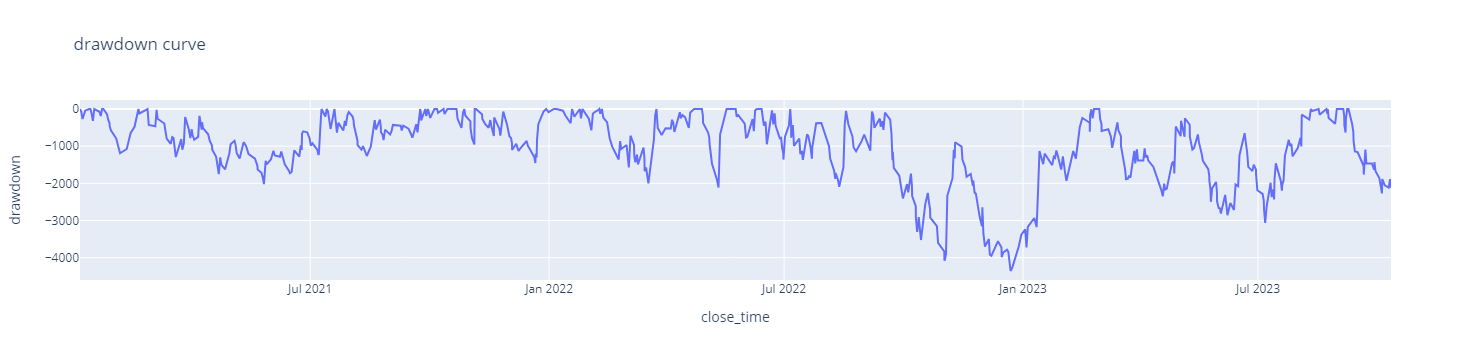

max_drawdown -4358.61


In [71]:
# 7) Absolute Drawdown
df['current_max'] = df['profit_cumulative'].expanding().max()
df['drawdown'] = df['profit_cumulative'] - df['current_max']
display(df)

fig_drawdown = px.line(df, x='close_time', y=['profit_cumulative', 'current_max'], title='pnl curve')
display(fig_drawdown)

fig_drawdown2 = px.line(df, x='close_time', y='drawdown', title='drawdown curve')
display(fig_drawdown2)

max_drawdown = df['drawdown'].min()
print('max_drawdown', round(max_drawdown, 2))